# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm
from kernels import phi

# Load data

In [2]:
# Load and standardize features by removing the mean and scaling to unit variance
StandardScaler = lambda df: (df-df.mean())/df.std()

XTrain0 = pd.read_csv('./data/Xtr0_mat100.csv', sep=' ', header=None)
XTrain1 = pd.read_csv('./data/Xtr1_mat100.csv', sep=' ', header=None)
XTrain2 = pd.read_csv('./data/Xtr2_mat100.csv', sep=' ', header=None)

# Standardize the Test features using the mean and std of the TRAIN features
XTest0 = (pd.read_csv('./data/Xte0_mat100.csv', sep=' ', header=None)-XTrain0.mean())/XTrain0.std()
XTest1 = (pd.read_csv('./data/Xte1_mat100.csv', sep=' ', header=None)-XTrain1.mean())/XTrain1.std()
XTest2 = (pd.read_csv('./data/Xte2_mat100.csv', sep=' ', header=None)-XTrain2.mean())/XTrain2.std()

YTrain0 = pd.read_csv('./data/Ytr0.csv', usecols = ['Bound'])
YTrain1 = pd.read_csv('./data/Ytr1.csv', usecols = ['Bound'])
YTrain2 = pd.read_csv('./data/Ytr2.csv', usecols = ['Bound'])

XTrain0_ATGC = pd.read_csv('./data/Xtr0.csv', sep=' ', header=None)
XTrain1_ATGC = pd.read_csv('./data/Xtr1.csv', sep=' ', header=None)
XTrain2_ATGC = pd.read_csv('./data/Xtr2.csv', sep=' ', header=None)

XTest0_ATGC = pd.read_csv('./data/Xte0.csv', sep=' ', header=None)
XTest1_ATGC = pd.read_csv('./data/Xte1.csv', sep=' ', header=None)
XTest2_ATGC = pd.read_csv('./data/Xte2.csv', sep=' ', header=None)


# Standardize Train features
XTrain0 = StandardScaler(XTrain0)
XTrain1 = StandardScaler(XTrain1)
XTrain2 = StandardScaler(XTrain2)

# Analysis functions

## PCA

In [3]:
def var_pca(features):
    pca = PCA(n_components=min(features.shape[1],2000))
    news=pca.fit(features)
    print("top 5 variance proportions in %",np.array(pca.explained_variance_ratio_[:5])*100)
    plt.plot(pca.explained_variance_)
    plt.title('Variances of PCA coefficients')
    plt.show()

In [4]:
def pca_visual(features):
    pca = PCA(n_components=2)
    news=pca.fit_transform(features)
    plt.scatter(news[YTrain0['Bound']==1,0],news[YTrain0['Bound']==1,1],color='red',alpha=0.6,lw=0.1,label='classe 1')
    plt.scatter(news[YTrain0['Bound']==0,0],news[YTrain0['Bound']==0,1],color='green',alpha=0.6,lw=0.1,label='classe 0')
    plt.title('PCA in 2D')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

## t-SNE

In [5]:
def tSNE_visual(features):
    X_embedded = TSNE(n_components=2).fit_transform(features)
    plt.scatter(X_embedded[YTrain0['Bound']==1,0],X_embedded[YTrain0['Bound']==1,1],color='red',alpha=0.6,lw=0.1,label='classe 1')
    plt.scatter(X_embedded[YTrain0['Bound']==0,0],X_embedded[YTrain0['Bound']==0,1],color='green',alpha=0.6,lw=0.1,label='classe 0')
    plt.title('t-SNE in 2D')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

# Generation of features with spectrum kernel

In [6]:
k=7 #length of subsequences considered

print('dimension of features:{}'.format(4**k))
XTrain0KF=np.zeros([len(XTrain0_ATGC)-1,4**k]) 
XTrain1KF=np.zeros([len(XTrain1_ATGC)-1,4**k])
XTrain2KF=np.zeros([len(XTrain2_ATGC)-1,4**k])

XTest0KF=np.zeros([len(XTest0_ATGC)-1,4**k])
XTest1KF=np.zeros([len(XTest1_ATGC)-1,4**k])
XTest2KF=np.zeros([len(XTest2_ATGC)-1,4**k])

ATGC=[XTrain0_ATGC,XTrain1_ATGC,XTrain2_ATGC,XTest0_ATGC,XTest1_ATGC,XTest2_ATGC]
KF=[XTrain0KF,XTrain1KF,XTrain2KF,XTest0KF,XTest1KF,XTest2KF]  #KF stands for kernel_features

for data in tqdm(range(6)):
    for idx,sequence in enumerate(ATGC[data][0][1:]): #[1:] pour ne pas prendre la ligne 'Id,seq'
        x = sequence.split(',')[1]
        KF[data][idx,:]=phi(x,k,kernel='spectrum_efficient')

# Standardize Train features
XTrain0KF = StandardScaler(XTrain0KF)
XTrain1KF = StandardScaler(XTrain1KF)
XTrain2KF = StandardScaler(XTrain2KF)


XTest0KF = XTest0KF-XTrain0KF.mean()/XTrain0KF.std()
XTest1KF = XTest1KF-XTrain1KF.mean()/XTrain1KF.std()
XTest2KF = XTest2KF-XTrain2KF.mean()/XTrain2KF.std()

  0%|          | 0/6 [00:00<?, ?it/s]

dimension of features:16384


100%|██████████| 6/6 [00:01<00:00,  3.14it/s]


# Comparison of features

## Variances proportions

top 5 variance proportions in % [9.71204165 8.36472966 4.34311958 2.87124875 2.57924841]


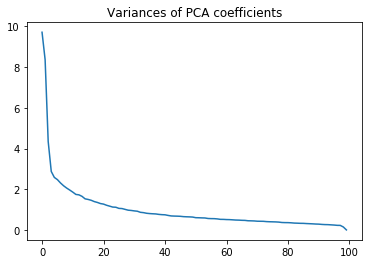

In [7]:
var_pca(XTrain0)

top 5 variance proportions in % [1.37761703 1.12266691 1.03460187 0.93020694 0.5573438 ]


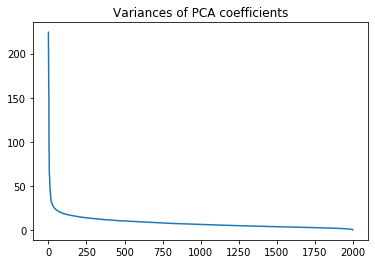

In [8]:
var_pca(XTrain0KF)

## Visual comparison of 2 first components with PCA

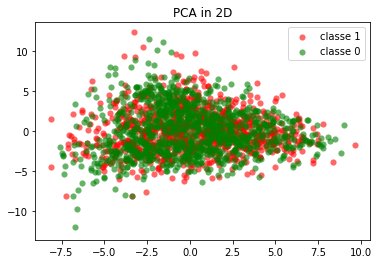

In [9]:
pca_visual(XTrain0)

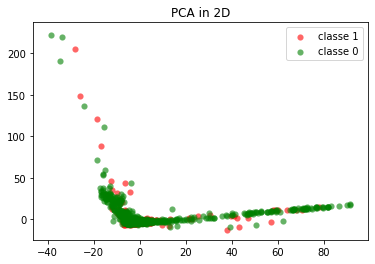

In [10]:
pca_visual(XTrain0KF)

## Visual comparison of 2 first components with t-SNE

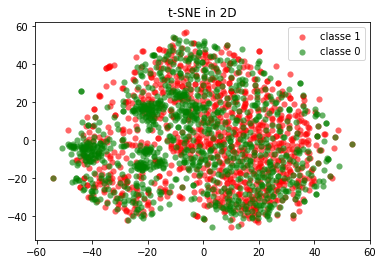

In [11]:
tSNE_visual(XTrain0)

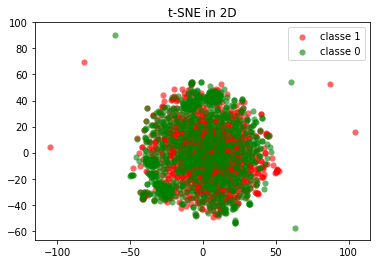

In [12]:
tSNE_visual(XTrain0KF)